In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
##Divide the dataset into dependent and independent features

# x is indpendent features and y is dependent feature
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
# Feature engineering::Basically there are categorical data which should be divided into categories
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

X=X.drop(['Geography','Gender'],axis=1)


In [5]:
X=pd.concat([X,geography,gender],axis=1)

In [6]:
# Splitting the datset into training set and splitting set
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Notice that fit transform is applied into training dataset and not in test dataset
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [9]:
# Let initalize ANN
classifier=Sequential()

In [10]:
# Adding the input Layer
# There are 11 units and the relu activation is applied in second layer
classifier.add(Dense(units=11,activation='relu'))

In [11]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [12]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [13]:
# adds the output layer
# For binary classification problem the output neuron consists of sigmoid activation function
classifier.add(Dense(1,activation='sigmoid'))

In [14]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
# A concept of Early stopping which stops the epochs if accuracy is constant
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3127 - accuracy: 0.8712 - val_loss: 0.3597 - val_accuracy: 0.8508
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3110 - accuracy: 0.8739 - val_loss: 0.3610 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3106 - accuracy: 0.8699 - val_loss: 0.3637 - val_accuracy: 0.8554
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3112 - accuracy: 0.8714 - val_loss: 0.3609 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3106 - accuracy: 0.8722 - val_loss: 0.3620 - val_accuracy: 0.8523
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3113 - accuracy: 0.8703 - val_loss: 0.3612 - val_accuracy: 0.8557
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3112 - accuracy: 0.8709 - val_loss: 0.3594 - val_accuracy

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

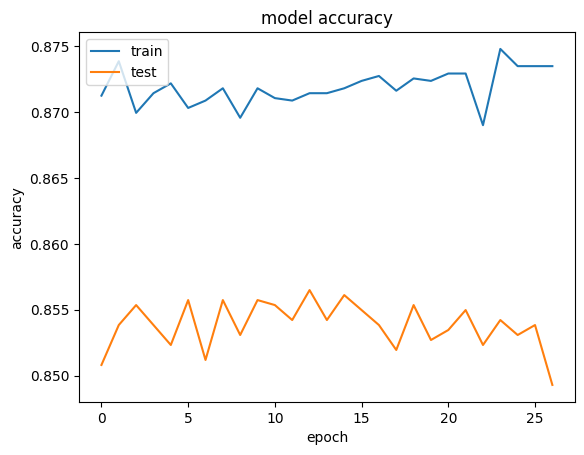

In [21]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

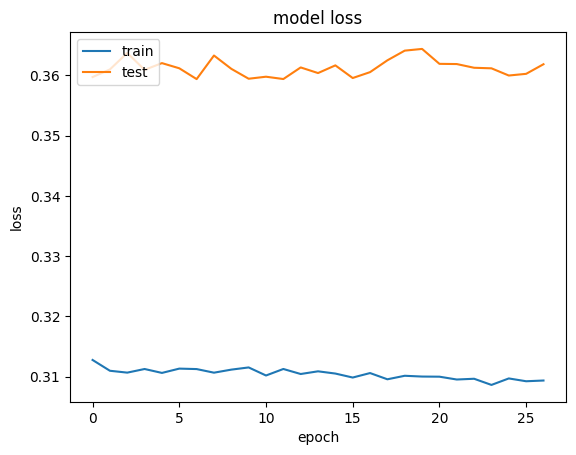

In [22]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [23]:
# Part 3 - Making the predictions and evaluating the model

#  Predicting the Test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [24]:
# make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1493,  102],
       [ 190,  215]])

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
score

0.854